In [82]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
np.random.seed(903378735)

In [112]:
from gen_training_data import describe_data , hr
data =  pd.read_csv('all_data_compiled.csv')
#print(data)
describe_data(data)
# selecting only non-transient sources
selected_class = [1400 , 1500 , 1410 , 1530 , 1430 , 1440 ,1600 , 1610 ,1640, 1650, 1690 ]
data = data[data['A_CLASS'].isin(selected_class)]
hr()
describe_data(data)
x = data.drop(['index_compiled' , 'class' , 'A_CLASS'] , axis=1)
#print(np.unique(x['A_CLASS']))
#print(np.unique(x['A_CLASS']))
y = data['class']

top_feat = np.loadtxt('rows/top_20_features.csv' ,dtype='str')[:15]
x = x[top_feat]
display(x)

Total Number of Sources :  1374
Number of Features :  427
Class 0 sources : 431
Class 1 sources : 943
_____________________________________________________________
Total Number of Sources :  1316
Number of Features :  427
Class 0 sources : 373
Class 1 sources : 943


,B_BII,B_NH_GAL,B_S_PHOTFLUX_AP90_AVG_HI,B_S_PHOTFLUX_AP90_AVG,B_HARDNESS_RATIO_HS_HI,B_S_PHOTFLUX_AP_AVG_HI,B_S_PHOTFLUX_AP90_AVG_LO,B_S_PHOTFLUX_AP_AVG,B_HARDNESS_RATIO_HS,B_H_SRC_AREA,B_HARDNESS_RATIO_MS_HI,B_HARDNESS_RATIO_MS,B_H_MINOR_AXIS_LO,B_H_MAJOR_AXIS,B_H_MINOR_AXIS
0,-0.570274,0.023202,0.037368,0.037152,-0.748,0.009895,0.037181,0.009841,-0.763764,0.000013,-0.462,-0.477477,0.010647,0.012129,0.012129
1,-0.570293,0.023246,0.000256,0.000222,0.000,0.000070,0.000186,0.000061,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,0.467271,0.020219,0.000000,0.000000,0.000,0.002175,0.000000,0.002152,0.000000,0.425906,0.000,0.000000,0.000000,0.000000,0.000000
3,-0.570286,0.023202,0.000114,0.000089,-0.407,0.000038,0.000065,0.000031,-0.635636,0.000000,-0.178,-0.367367,0.000000,0.000000,0.000000
4,-0.054967,0.223684,0.000000,0.000000,0.000,0.002789,0.000000,0.002540,0.000000,0.018197,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,0.466843,0.020219,0.000024,0.000017,0.000,0.000004,0.000009,0.000002,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1370,-0.570338,0.023246,0.000471,0.000425,0.000,0.000123,0.000381,0.000111,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1371,0.468218,0.020088,0.000066,0.000047,-0.204,0.000015,0.000027,0.000010,-1.000000,0.000000,0.507,0.155155,0.000000,0.000000,0.000000
1372,-0.570285,0.023202,0.097368,0.097351,-0.799,0.026316,0.097987,0.026279,-0.804805,0.000012,-0.519,-0.525526,0.010746,0.011634,0.011634


## Selecting only top 20 features

In [113]:
def split_data(x,y,s):   
    x =  x.to_numpy()
    y =  y.to_numpy()
    split = s
    split_no = int(split*len(y))
    x_train = x[:split_no, :]
    y_train = y[:split_no]
    x_test = x[split_no:, :]
    y_test = y[split_no:]
    return ((x_train,y_train) , (x_test ,y_test))

(x_train,y_train),(x_test,y_test) = split_data(x, y, 0.7)
_ , (x_test_copy , y_test_copy) = split_data(x, y, 0.7)
print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
np.shape(x_test_copy)

(921, 15) (921,)
(395, 15) (395,)


(921, 15)

# Neural Netork starts here

In [114]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [115]:
one_hot_y_train =  to_categorical(y_train)
one_hot_y_test =  to_categorical(y_test)

In [116]:
print(len(one_hot_y_train[1]))

2


In [117]:
np.random.seed(903378735)
def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(64, activation='relu')
    x = dense(inputs)
    x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    for s in shape:
        x = layers.Dense(s, activation='relu')(x)
    x =  layers.BatchNormalization(axis=-1)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    np.random.seed(903378735)
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([64,64,64,32,32] , x_train.shape[1])
history = model.fit(x_train, one_hot_y_train, batch_size=64, epochs=60, validation_split=0.2)


Epoch 1/60
12/12 [==============================] - 1s 22ms/step - loss: 0.5543 - accuracy: 0.7405 - val_loss: 0.6397 - val_accuracy: 0.7459
Epoch 2/60
12/12 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.9049 - val_loss: 0.5992 - val_accuracy: 0.7459
Epoch 3/60
12/12 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.9049 - val_loss: 0.5736 - val_accuracy: 0.7514
Epoch 4/60
12/12 [==============================] - 0s 5ms/step - loss: 0.2227 - accuracy: 0.9280 - val_loss: 0.5537 - val_accuracy: 0.7514
Epoch 5/60
12/12 [==============================] - 0s 5ms/step - loss: 0.2280 - accuracy: 0.9266 - val_loss: 0.5435 - val_accuracy: 0.7514
Epoch 6/60
12/12 [==============================] - 0s 6ms/step - loss: 0.2020 - accuracy: 0.9321 - val_loss: 0.5306 - val_accuracy: 0.7514
Epoch 7/60
12/12 [==============================] - 0s 6ms/step - loss: 0.1838 - accuracy: 0.9321 - val_loss: 0.5211 - val_accuracy: 0.7514
Epoch 8/60
12/12 [=

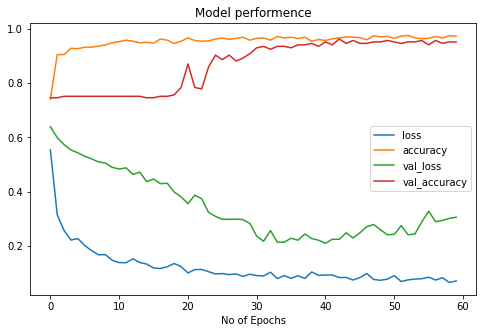

In [118]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("No of Epochs")
plt.title('Model performence')
plt.savefig('plots/bn_model_level_0_rows.png')
plt.show()

In [119]:
model.summary()

Model: "trial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                1024      
_________________________________________________________________
batch_normalization_16 (Batc (None, 64)                256       
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_58 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_59 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                

In [120]:
def acc_score(model , y_test , x_test):
    print('----inside acc function')
    print(np.shape(x_test))
    y_pred = model.predict(x_test)
    print(np.shape(y_pred))
    print(np.shape(y_test))
    y_pred = [np.argmax(r) for r in y_pred]
    y_test = [np.argmax(r) for r in y_test]
    correct = 0
    total =  len(y_test)
    for y1,y2 in zip(y_pred,y_test):
        if(int(y1)==int(y2)):
            correct+=1
        else:
            continue
    print('correct prediction :' , correct)
    print('total prediction :' , total)
    print('Score {:.2F}'.format(correct/total*100))
    return(correct/total*100)
print('training data prediction')
acc_score(model, one_hot_y_train, x_train)
print('----------------------------------')
print('test data prediciton')
acc_score(model, one_hot_y_test, x_test)

training data prediction
----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 897
total prediction : 921
Score 97.39
----------------------------------
test data prediciton
----inside acc function
(395, 15)
(395, 2)
(395, 2)
correct prediction : 377
total prediction : 395
Score 95.44


95.44303797468355

## Feature reshuffling

In [122]:
'''
(x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
print(np.shape(x_test_copy))
oh_y =  to_categorical(y_test_copy)
s = acc_score(model, oh_y, x_test_copy)
'''
acc_list = []

for index in range(x.shape[1]):
    (x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
    np.shape(x_test_copy)
    oh_y =  to_categorical(y_test_copy)
    acc_score(model, oh_y, x_test_copy)
    temp = x_test_copy[:,index]
    print(temp[:10])
    x_test_copy[:,index] = np.zeros(np.shape(x_test_copy[:,index]))
    temp = x_test_copy[:,index]
    s = acc_score(model, oh_y, x_test_copy)
    acc_list.append(s)
    print(temp[:10])

----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 665
total prediction : 921
Score 72.20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 665
total prediction : 921
Score 72.20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 665
total prediction : 921
Score 72.20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 665
total prediction : 921
Score 72.20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 665
total prediction : 921
Score 72.20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 665
total prediction : 921
Score 72.20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(921, 15)
(921, 2)
(921, 2)
correct prediction : 665
total prediction : 921
Score 72.20
[0. 0. 0. 0. 0. 0. 0. 0.

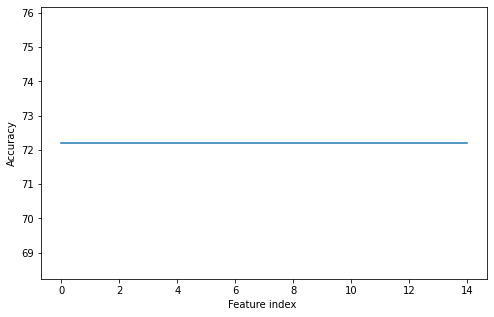

0
------------------------------------


In [123]:
plt.figure(figsize=(8,5))
y_index = np.linspace(0,424, len(acc_list))
plt.plot(acc_list)
plt.xlabel('Feature index ')
plt.ylabel('Accuracy')
plt.savefig('plots/acc.png')
#plt.ylim(90,100)
#plt.xlim(110,210)
plt.show()
print(np.argmin(acc_list))
curr_rows =  pd.read_csv('rows/current_rows.csv' , names=['index','name'] , delimiter=' ')
acc_max = np.average(acc_list)
for i in range(len(acc_list)):
    if(acc_list[i]<0.995*acc_max):
        print(curr_rows.iloc[i]['name'])
print('------------------------------------')
for i in range(len(acc_list)):
    if(acc_list[i]>1.01*acc_max):
        print(curr_rows.iloc[i]['name'])
#print(curr_rows.iloc[66])

In [124]:
_ , (x_test_copy , y_test_copy) = split_data(x, y, 0.7)
index = 100
temp = x_test_copy[:,index]
print(temp[:10])
x_test_copy[:,index] =  np.zeros(temp.shape)
print(x_test_copy[:,index][:10])
x_test_copy[:,index] = temp 
print(x_test_copy[:,index][:10])

IndexError: index 100 is out of bounds for axis 1 with size 15

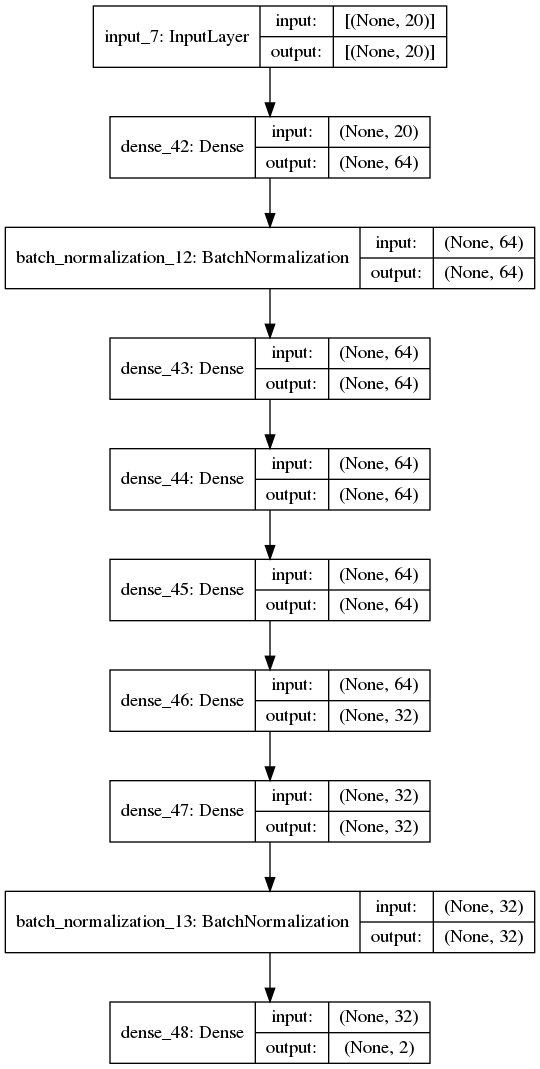

In [100]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='plots/model_plot.png', show_shapes=True, show_layer_names=True)

In [125]:
curr_rows =  pd.read_csv('rows/current_rows.csv' )
print(curr_rows.iloc[66])

0 B_B_FLUX_AP    67 B_BB_KT_HI
Name: 66, dtype: object


## Prediction on 47Tuc GC

In [127]:
tuc_data =  pd.read_csv('47_tuc_only.csv')

describe_data(tuc_data)
x_tuc = tuc_data.drop(['index_compiled' , 'class'] , axis=1)
x_tuc = x_tuc[top_feat]
display(x_tuc)
tuc_pred = model.predict(x_tuc)
lmxb_count = [np.amax(l) for l in tuc_pred]
print(lmxb_count)

Total Number of Sources :  289
Number of Features :  426
Class 0 sources : 289


,B_BII,B_NH_GAL,B_S_PHOTFLUX_AP90_AVG_HI,B_S_PHOTFLUX_AP90_AVG,B_HARDNESS_RATIO_HS_HI,B_S_PHOTFLUX_AP_AVG_HI,B_S_PHOTFLUX_AP90_AVG_LO,B_S_PHOTFLUX_AP_AVG,B_HARDNESS_RATIO_HS,B_H_SRC_AREA,B_HARDNESS_RATIO_MS_HI,B_HARDNESS_RATIO_MS,B_H_MINOR_AXIS_LO,B_H_MAJOR_AXIS,B_H_MINOR_AXIS
0,1.001032,0.986940,0.004966,0.004483,-0.166,0.004693,0.003959,0.004228,-0.301301,0.0,-0.0381,-0.171171,0.0,0.0,0.0
1,1.000992,0.988806,0.001946,0.001578,0.000,0.002287,0.001205,0.001899,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0
2,1.001002,0.988806,0.001277,0.001034,-0.307,0.001540,0.000788,0.001282,-0.496496,0.0,-0.3320,-0.491491,0.0,0.0,0.0
3,1.000013,0.985075,0.000777,0.000592,0.395,0.000645,0.000394,0.000447,0.026226,0.0,-0.5950,-1.000000,0.0,0.0,0.0
4,1.000855,0.986940,0.013446,0.012789,-0.238,0.013133,0.011986,0.012483,-0.435435,0.0,-0.1340,-0.307307,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.001021,0.992537,0.000811,0.000614,-0.686,0.000740,0.000415,0.000556,-1.000000,0.0,-0.2950,-0.528529,0.0,0.0,0.0
285,1.000918,0.986940,0.001608,0.001340,-0.285,0.001593,0.001075,0.001329,-0.511512,0.0,-0.1020,-0.291291,0.0,0.0,0.0
286,1.001231,0.992537,0.001500,0.001218,-0.834,0.001427,0.000932,0.001154,-1.000000,0.0,-0.5540,-0.706707,0.0,0.0,0.0
287,1.001049,0.988806,0.001365,0.001129,0.217,0.001480,0.000890,0.001242,0.056256,0.0,0.0269,-0.131131,0.0,0.0,0.0


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9597464, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0